23BCE247, 23BCE251 - DAV Assginment

In [87]:
!pip3 install graphviz
!pip3 install dask
!pip install "dask[complete]" 
!pip3 install toolz
!pip3 install cloudpickle
!pip3 install folium
!pip install gpxpy
!pip3 install pyroomacoustics
!pip3 install prophet

In [88]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML + Time Series
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Optional
import folium
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv("yellow_tripdata_2015-01.csv", parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [90]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748986 entries, 0 to 12748985
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   pickup_longitude       float64       
 6   pickup_latitude        float64       
 7   RateCodeID             int64         
 8   store_and_fwd_flag     object        
 9   dropoff_longitude      float64       
 10  dropoff_latitude       float64       
 11  payment_type           int64         
 12  fare_amount            float64       
 13  extra                  float64       
 14  mta_tax                float64       
 15  tip_amount             float64       
 16  tolls_amount           float64       
 17  improvement_surcharge  float64       
 18  total_amount        

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.274899e+07,12748986,12748986,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274898e+07,1.274899e+07
mean,1.521437e+00,2015-01-16 14:42:45.468311296,2015-01-16 14:56:56.208538368,1.681491e+00,1.345913e+01,-7.256184e+01,3.997282e+01,1.036901e+00,-7.260904e+01,3.999961e+01,1.386712e+00,1.190566e+01,3.082790e-01,4.977986e-01,1.853814e+00,2.434984e-01,2.831431e-01,1.510829e+01
min,1.000000e+00,2015-01-01 00:00:00,2015-01-01 00:00:00,0.000000e+00,0.000000e+00,-1.219258e+02,0.000000e+00,1.000000e+00,-7.401667e+02,-9.029157e+00,1.000000e+00,-4.500000e+02,-7.900000e+01,-5.000000e-01,-9.242000e+01,-2.600000e+01,0.000000e+00,-4.503000e+02
25%,1.000000e+00,2015-01-09 09:26:51,2015-01-09 09:44:29,1.000000e+00,1.000000e+00,-7.399168e+01,4.073554e+01,1.000000e+00,-7.399120e+01,4.073436e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00
50%,2.000000e+00,2015-01-16 11:42:49,2015-01-16 11:56:56,1.000000e+00,1.680000e+00,-7.398160e+01,4.075314e+01,1.000000e+00,-7.397976e+01,4.075362e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01
75%,2.000000e+00,2015-01-23 19:15:29,2015-01-23 19:29:03.750000128,2.000000e+00,3.000000e+00,-7.396662e+01,4.076757e+01,1.000000e+00,-7.396246e+01,4.076880e+01,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.060000e+00,0.000000e+00,3.000000e-01,1.630000e+01
max,2.000000e+00,2015-01-31 23:59:59,2016-02-02 16:30:52,9.000000e+00,1.542000e+07,7.866265e+01,4.047000e+02,9.900000e+01,8.527402e+01,4.595333e+02,5.000000e+00,4.008000e+03,9.999900e+02,5.000000e-01,3.950589e+06,1.450090e+03,3.000000e-01,3.950612e+06
std,4.995402e-01,NaN,NaN,1.337924e+00,9.844094e+03,1.012510e+01,5.578691e+00,6.732240e-01,9.966037e+00,5.487742e+00,4.988611e-01,1.030254e+01,5.916643e-01,3.534229e-02,1.106432e+03,1.527171e+00,6.908633e-02,1.106503e+03


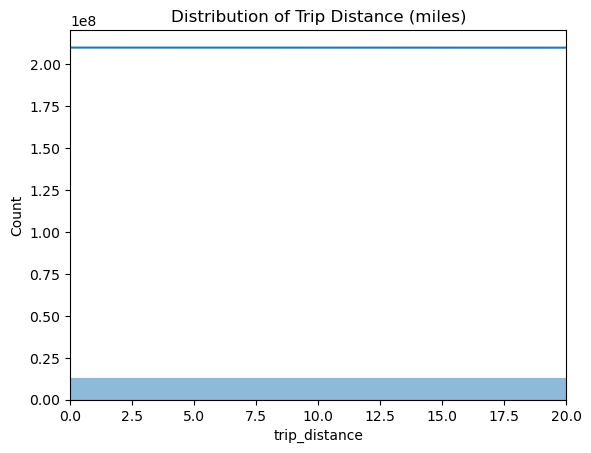

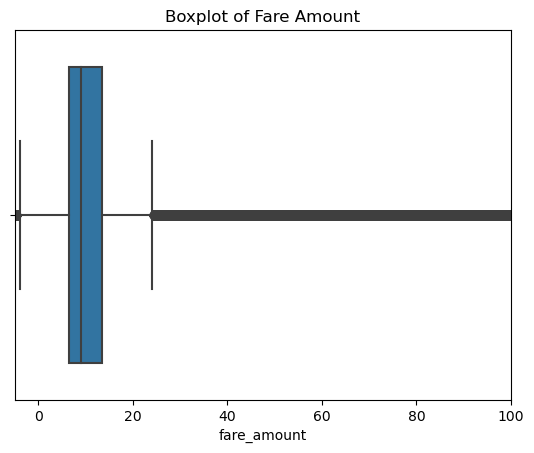

In [91]:
# Trip Distance distribution
sns.histplot(df['trip_distance'], bins=1000, kde=True)
plt.title("Distribution of Trip Distance (miles)")
plt.xlim(0, 20)
plt.show()

# Fare amount distribution
sns.boxplot(x=df['fare_amount'])
plt.title("Boxplot of Fare Amount")
plt.xlim(-5, 100)
plt.show()

1 - Data Cleaning

1.1 Handling Missing Values/ Invalid Values

In [94]:
# Check missingness
df.isna().sum().sort_values(ascending=False)

improvement_surcharge    3
VendorID                 0
dropoff_latitude         0
tolls_amount             0
tip_amount               0
mta_tax                  0
extra                    0
fare_amount              0
payment_type             0
dropoff_longitude        0
tpep_pickup_datetime     0
store_and_fwd_flag       0
RateCodeID               0
pickup_latitude          0
pickup_longitude         0
trip_distance            0
passenger_count          0
tpep_dropoff_datetime    0
total_amount             0
dtype: int64

In [95]:
# Drop rows with missing critical info
df.dropna(subset=['improvement_surcharge', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                  'fare_amount', 'total_amount'], inplace=True)

# Filter out physically impossible trips
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['total_amount'] > 0)]

# Compute trip duration
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df = df[(df['trip_duration_min'] >= 1) & (df['trip_duration_min'] <= 180)]

# Passenger limits
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]

print("Cleaned data shape:", df.shape)

Cleaned data shape: (12609905, 20)


1.2 Check Duration Distribution

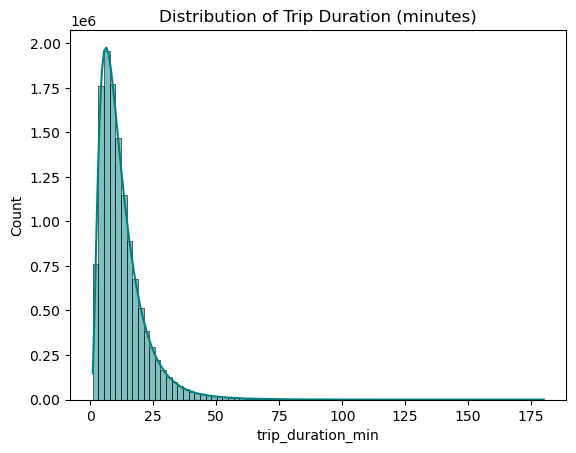

In [97]:
sns.histplot(df['trip_duration_min'], bins=80, kde=True, color='teal')
plt.title("Distribution of Trip Duration (minutes)")
plt.show()

1.3 Fix Geographical Bounds

New York City bounding box roughly:
Latitude: 40.5 – 41, Longitude: -74.3 – -73.6

In [100]:
df = df[
    (df['pickup_latitude'].between(40.5, 41)) & (df['pickup_longitude'].between(-74.3, -73.6)) &
    (df['dropoff_latitude'].between(40.5, 41)) & (df['dropoff_longitude'].between(-74.3, -73.6))
]
print("After Geo-filtering:", df.shape)

After Geo-filtering: (12378715, 20)


2 - Handling Duplicates

In [102]:
print("Before Removal Shape:", df.shape)
duplicates = df.duplicated().sum()
print(f"Duplicates found: {duplicates}")
df.drop_duplicates(inplace=True)
print("After Removal Shape:", df.shape)

Before Removal Shape: (12378715, 20)
Duplicates found: 0
After Removal Shape: (12378715, 20)


3 - Feature Engineering

3.1 Time Based Features

In [105]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day'] = df['tpep_pickup_datetime'].dt.day
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

df[['hour', 'day', 'month', 'day_of_week', 'is_weekend']].head()

,hour,day,month,day_of_week,is_weekend
0,19,15,1,3,0
1,20,10,1,5,1
2,20,10,1,5,1
3,20,10,1,5,1
4,20,10,1,5,1


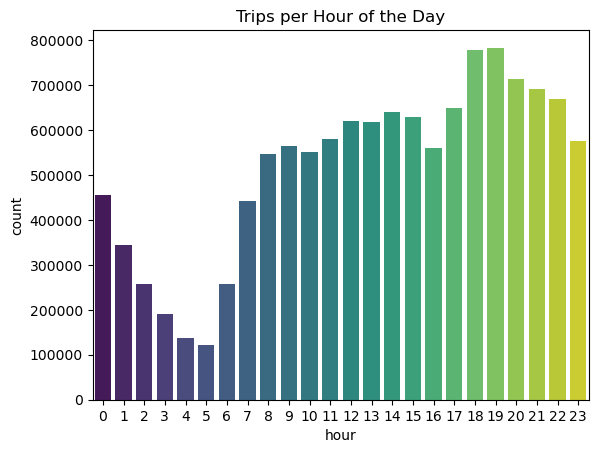

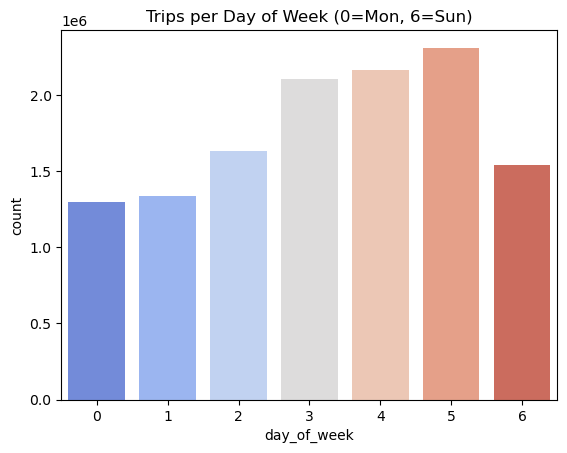

In [106]:
sns.countplot(x='hour', data=df, palette='viridis')
plt.title("Trips per Hour of the Day")
plt.show()

sns.countplot(x='day_of_week', data=df, palette='coolwarm')
plt.title("Trips per Day of Week (0=Mon, 6=Sun)")
plt.show()

3.2 Haversine Distance

Calculate the actual spherical distance between pickup and dropoff coordinates (as a validation for trip_distance).

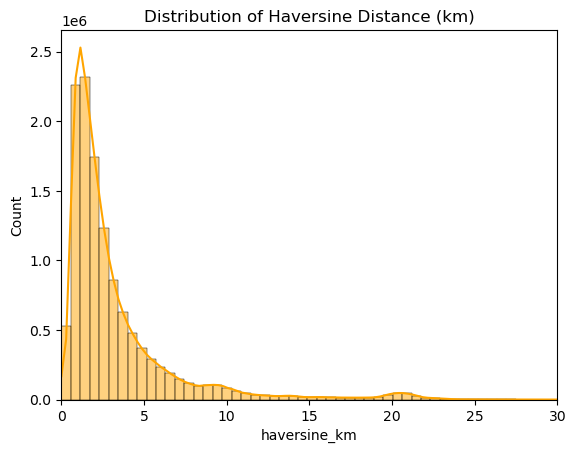

In [109]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

df['haversine_km'] = haversine(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude']
)

sns.histplot(df['haversine_km'], bins=100, kde=True, color='orange')
plt.title("Distribution of Haversine Distance (km)")
plt.xlim(0, 30)
plt.show()

3.3 Average Speed

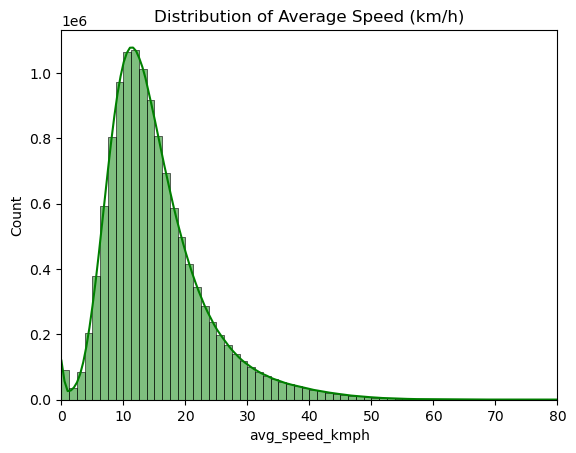

In [111]:
df['avg_speed_kmph'] = df['haversine_km'] / (df['trip_duration_min'] / 60)
df = df[df['avg_speed_kmph'] <= 100]  # remove unrealistic speeds

sns.histplot(df['avg_speed_kmph'], bins=80, kde=True, color='green')
plt.title("Distribution of Average Speed (km/h)")
plt.xlim(0, 80)
plt.show()

3.4 Tip & Fare Efficiency Features

In [113]:
df['tip_rate'] = df['tip_amount'] / df['fare_amount']
df['tip_rate'] = df['tip_rate'].clip(0, 1)

df['fare_per_km'] = df['fare_amount'] / (df['haversine_km'] + 1e-5)
df['fare_per_min'] = df['fare_amount'] / (df['trip_duration_min'] + 1e-5)

print(df[['tip_rate', 'fare_per_km', 'fare_per_min']].describe())

           tip_rate   fare_per_km  fare_per_min
count  1.237801e+07  1.237801e+07  1.237801e+07
mean   1.289994e-01  4.142492e+03  1.029763e+00
std    1.195078e-01  8.198000e+04  6.828028e-01
min    0.000000e+00  2.000363e-04  8.341442e-05
25%    0.000000e+00  3.333425e+00  8.215959e-01
50%    1.538462e-01  4.234402e+00  9.523797e-01
75%    2.216667e-01  5.486734e+00  1.140141e+00
max    1.000000e+00  7.800000e+07  8.059629e+02


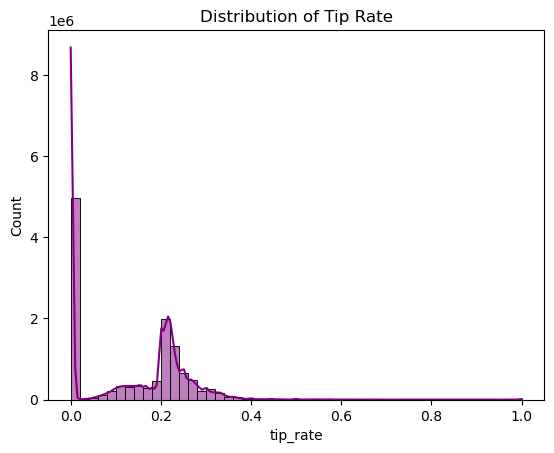

In [114]:
sns.histplot(df['tip_rate'], bins=50, kde=True, color='purple')
plt.title("Distribution of Tip Rate")
plt.show()

4 - Dropping Irrelevant Columns

In [116]:
cols_to_remove = [
    'store_and_fwd_flag',  # mostly categorical Y/N
    'RatecodeID',          # redundant with payment_type
    'extra',               # small constant value
    'improvement_surcharge' # constant 0.3
]

df.drop(columns=[c for c in cols_to_remove if c in df.columns], inplace=True, errors='ignore')

print("Dropped unnecessary columns:", cols_to_remove)
print("Remaining columns:", df.columns.tolist())

Dropped unnecessary columns: ['store_and_fwd_flag', 'RatecodeID', 'extra', 'improvement_surcharge']
Remaining columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RateCodeID', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'trip_duration_min', 'hour', 'day', 'month', 'day_of_week', 'is_weekend', 'haversine_km', 'avg_speed_kmph', 'tip_rate', 'fare_per_km', 'fare_per_min']


5 - Outlier Treatment

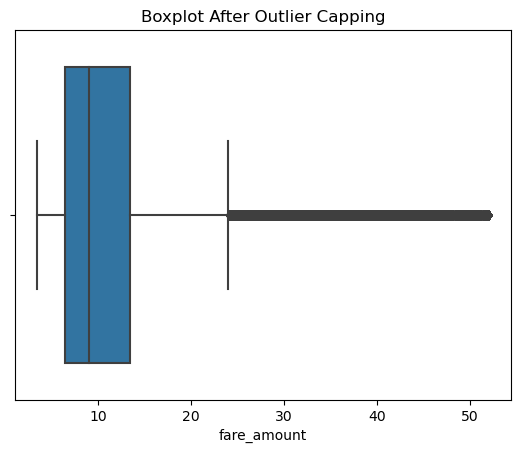

In [118]:
def cap_outliers(series, low=0.01, high=0.99):
    lower, upper = series.quantile([low, high])
    return np.clip(series, lower, upper)

for col in ['trip_distance', 'fare_amount', 'total_amount', 'trip_duration_min']:
    df[col] = cap_outliers(df[col])

sns.boxplot(x=df['fare_amount'])
plt.title("Boxplot After Outlier Capping")
plt.show()

In [119]:
#  Quantile-Based Outlier Removal
# Columns to apply trimming on
cols_to_trim = ['trip_distance', 'fare_amount', 'total_amount',
                'trip_duration_min', 'haversine_km', 'avg_speed_kmph']

print("Before trimming:", df.shape)

for col in cols_to_trim:
    # Get 1st and 99th percentiles
    lower, upper = df[col].quantile([0.01, 0.99])
    
    # Apply filter
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    print(f"{col}: kept between {round(lower,2)} and {round(upper,2)}")

print("\nAfter quantile-based outlier removal:", df.shape)

Before trimming: (12378008, 27)
trip_distance: kept between 0.3 and 18.2
fare_amount: kept between 3.5 and 52.0
total_amount: kept between 4.8 and 67.13
trip_duration_min: kept between 1.8 and 45.78
haversine_km: kept between 0.26 and 20.5
avg_speed_kmph: kept between 3.87 and 40.63

After quantile-based outlier removal: (11887836, 27)


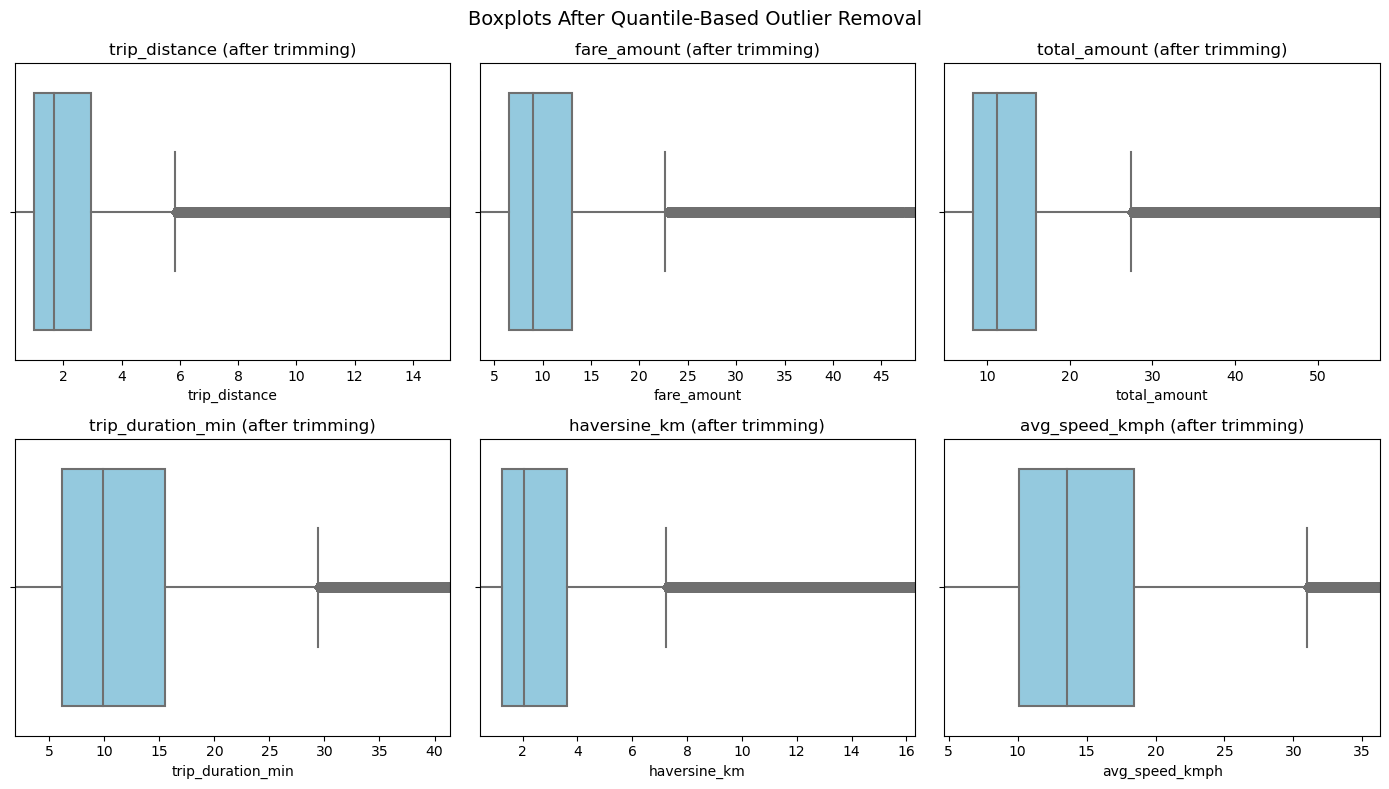

In [120]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(cols_to_trim):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"{col} (after trimming)")
    axes[i].set_xlim(df[col].quantile(0.01), df[col].quantile(0.99))

plt.suptitle("Boxplots After Quantile-Based Outlier Removal", fontsize=14)
plt.tight_layout()
plt.show()

6 - Correlation Check

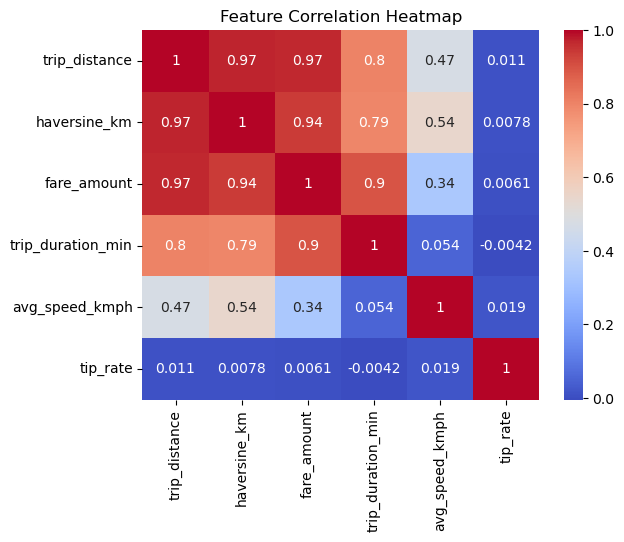

In [122]:
corr = df[['trip_distance', 'haversine_km', 'fare_amount', 
           'trip_duration_min', 'avg_speed_kmph', 'tip_rate']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

7 - Encode Categorical and Scale Numerical Values

In [124]:
df['payment_type'] = df['payment_type'].astype('category')
df['VendorID'] = df['VendorID'].astype('category')

num_features = ['trip_distance', 'trip_duration_min', 'avg_speed_kmph']

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

print("Scaling Completed")
df[num_features].head()

Scaling Completed


,trip_distance,trip_duration_min,avg_speed_kmph
0,-0.360251,0.763000,-1.416687
1,0.265567,0.985102,-0.455137
2,-0.283397,-0.233349,0.076908
3,-0.759165,-1.252530,1.561402
4,0.155774,0.920755,-0.582384


In [125]:
df.to_csv('nyc_taxi_2015_clean.csv', index=False)
print("Cleaned dataset saved! Final shape:", df.shape)

Cleaned dataset saved! Final shape: (11887836, 27)


8 - Spatial Visualization

In [127]:
import folium
from folium.plugins import HeatMap

sample_df = df.sample(10000)
m = folium.Map(location=[40.75, -73.98], zoom_start=11)
HeatMap(sample_df[['pickup_latitude','pickup_longitude']]).add_to(m)
m

9 - Clustering

Identifying pickup hotspots

9.1 Preparing Data

In [131]:
coords = df[['pickup_latitude','pickup_longitude']].sample(50000, random_state=42)

9.2 Apply K Means

In [133]:
kmeans = MiniBatchKMeans(n_clusters=20, random_state=42, batch_size=10000)
labels = kmeans.fit_predict(coords)
coords['cluster'] = labels

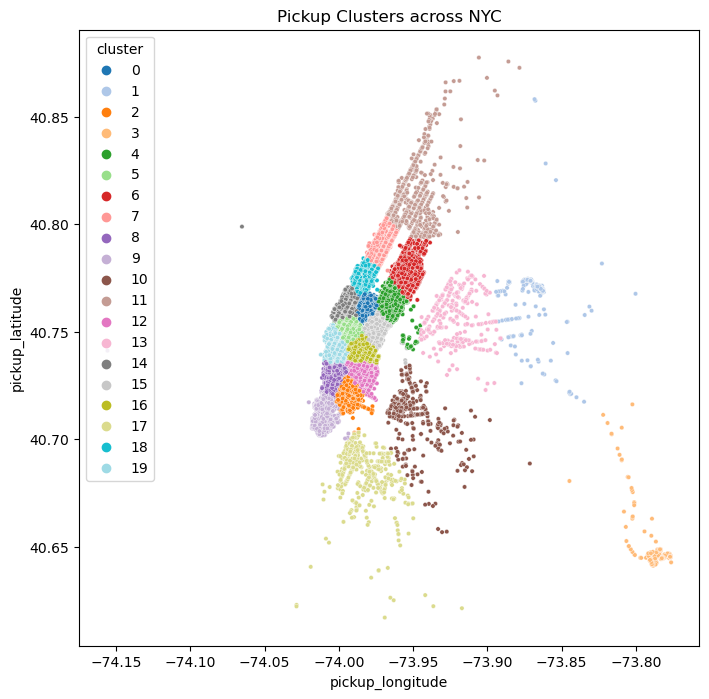

In [134]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='cluster', data=coords, palette='tab20', s=10)
plt.title('Pickup Clusters across NYC')
plt.show()

10 - Regression

Fare Prediction - predict total_amount using distance, duration, time, and passenger features.

In [149]:
# Use a 5% sample for fast but accurate results
df_sample = df.sample(frac=0.05, random_state=42)

print(f"Original dataset: {len(df):,} rows")
print(f"Sampled dataset: {len(df_sample):,} rows")
df_sample.head()

Original dataset: 11,887,836 rows
Sampled dataset: 594,392 rows


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,...,hour,day,month,day_of_week,is_weekend,haversine_km,avg_speed_kmph,tip_rate,fare_per_km,fare_per_min
75746,2,2015-01-24 04:02:33,2015-01-24 04:23:18,1,0.770613,-73.987267,40.729053,1,-73.984802,40.670853,...,4,24,1,5,1,6.474971,0.555449,0.214857,2.702711,0.843373
1121975,2,2015-01-29 15:19:19,2015-01-29 15:24:42,1,-0.700609,-73.952011,40.781647,1,-73.953300,40.788322,...,15,29,1,3,0,0.750202,-0.973133,0.229091,7.331262,1.021670
12150058,1,2015-01-16 01:23:34,2015-01-16 01:36:09,1,0.411957,-73.986160,40.767426,1,-73.947510,40.783691,...,1,16,1,4,0,3.723376,0.412502,0.219231,3.491445,1.033112
182279,2,2015-01-28 12:17:54,2015-01-28 12:33:18,2,-0.169944,-73.955833,40.787998,1,-73.974968,40.761581,...,12,28,1,2,0,3.350296,-0.280981,0.000000,3.283282,0.714285
10819573,1,2015-01-31 15:53:58,2015-01-31 16:14:53,1,0.155774,-73.981995,40.779026,1,-73.980232,40.745392,...,15,31,1,5,1,3.742895,-0.622727,0.096774,4.141168,0.741036


10.1 Feature Selection and Splitting

In [151]:
from sklearn.model_selection import train_test_split

features = ['trip_distance', 'trip_duration_min', 'passenger_count', 'hour', 'day_of_week']
target = 'total_amount'

X = df_sample[features]
y = df_sample[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data split successful")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Data split successful
Train shape: (475513, 5)
Test shape: (118879, 5)


10.2 Scale Numerical Features

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed")

Scaling completed


10.3 Train Model

In [155]:
from sklearn.ensemble import RandomForestRegressor
import time

model = RandomForestRegressor(
    n_estimators=50,    
    max_depth=12,       
    n_jobs=-1,          
    random_state=42
)

start = time.time()
model.fit(X_train_scaled, y_train)
train_time = time.time() - start

print(f"Model trained successfully in {train_time:.2f} seconds")

Model trained successfully in 18.26 seconds


10.4 Evalute

In [157]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

preds = model.predict(X_test_scaled)

r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

R² Score: 0.945
Mean Absolute Error (MAE): $1.29
Root Mean Squared Error (RMSE): $2.27


10.5 Visualize Predictions VS Actual

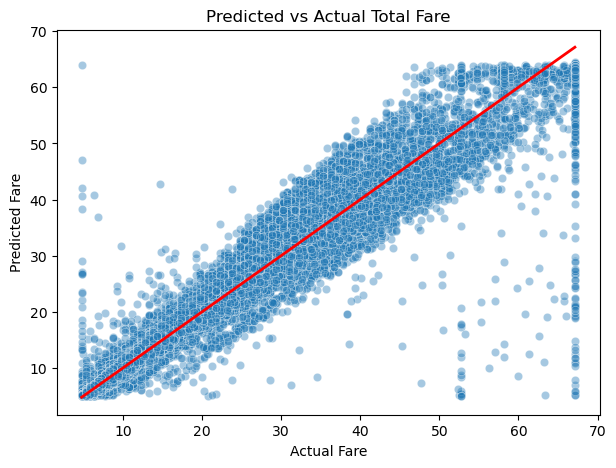

In [159]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Predicted vs Actual Total Fare")
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.show()

10.6 Feature Importance

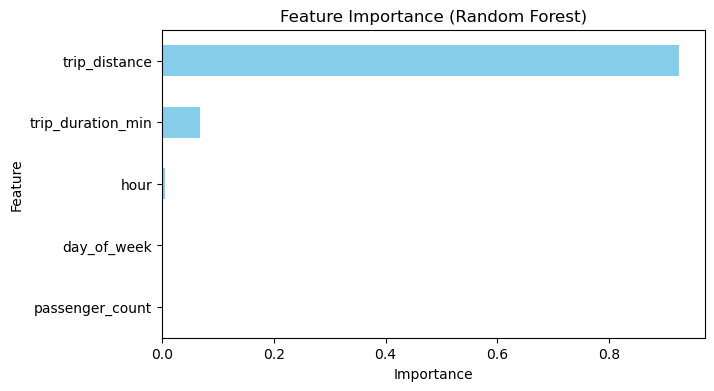

In [165]:
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(7,4))
importances.plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

10.7 Comparison with Linear Regression 

In [167]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
preds_lr = lr.predict(X_test_scaled)

r2_lr = r2_score(y_test, preds_lr)
print(f"Linear Regression R²: {r2_lr:.3f}")

Linear Regression R²: 0.940


11 - Time Series Analysis 

11.1 Aggregate Daily Trips

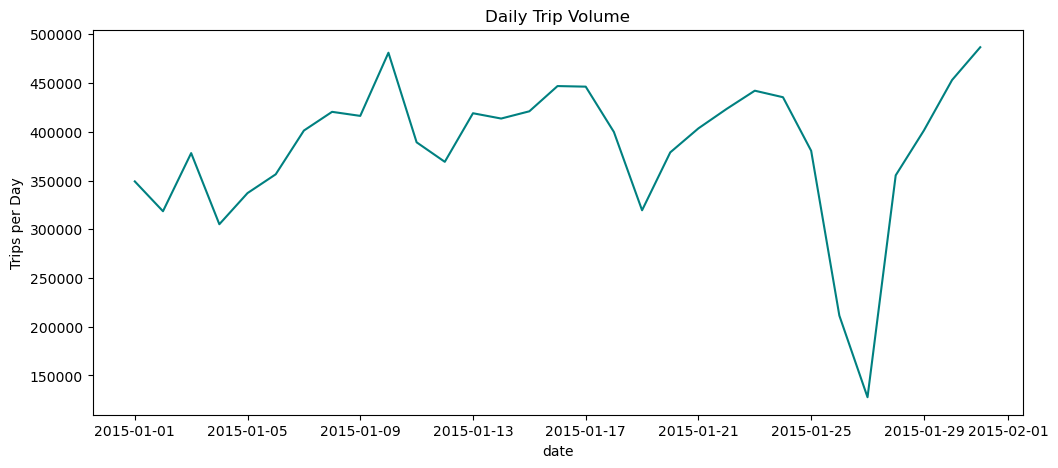

In [169]:
df['date'] = df['tpep_pickup_datetime'].dt.date
daily_trips = df.groupby('date').size()

plt.figure(figsize=(12,5))
daily_trips.plot(color='teal')
plt.title("Daily Trip Volume")
plt.ylabel("Trips per Day")
plt.show()

11.2 Hourly Trends

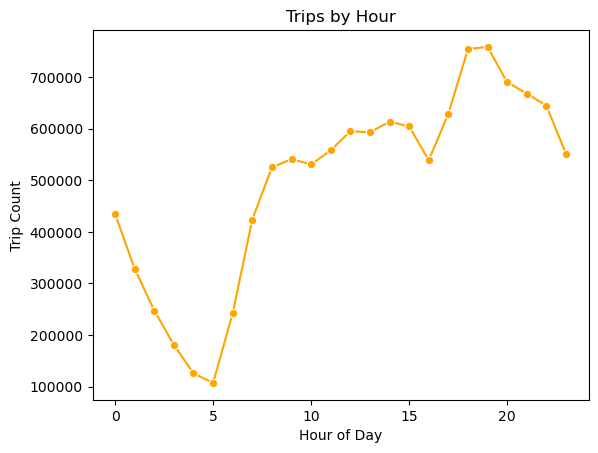

In [173]:
hourly = df.groupby('hour').size()
sns.lineplot(x=hourly.index, y=hourly.values, marker='o', color='orange')
plt.title("Trips by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.show()

11.3 Rolling Average

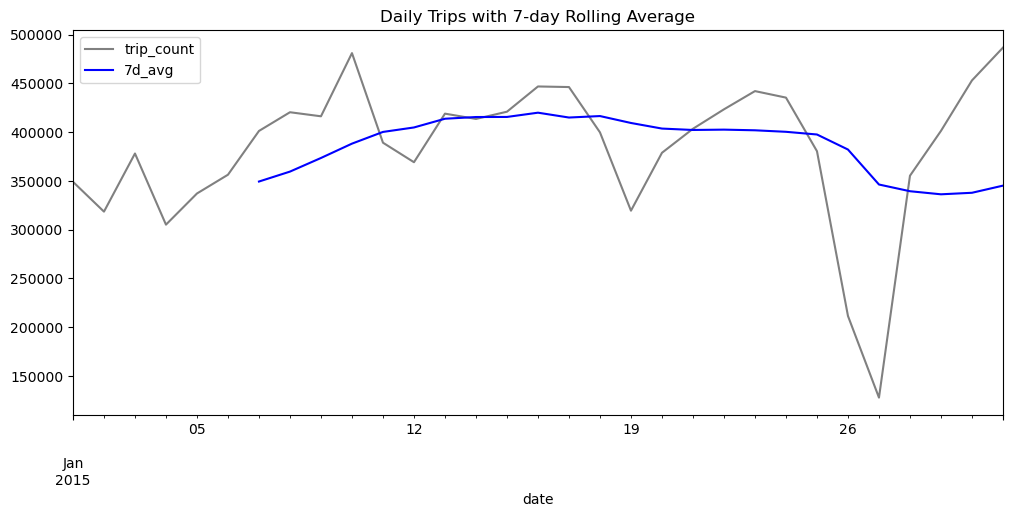

In [175]:
daily_trips = daily_trips.reset_index(name='trip_count')
daily_trips['date'] = pd.to_datetime(daily_trips['date'])
daily_trips.set_index('date', inplace=True)
daily_trips['7d_avg'] = daily_trips['trip_count'].rolling(7).mean()

daily_trips[['trip_count','7d_avg']].plot(figsize=(12,5), color=['gray','blue'])
plt.title("Daily Trips with 7-day Rolling Average")
plt.show()

11.4 Time Series Decomposition

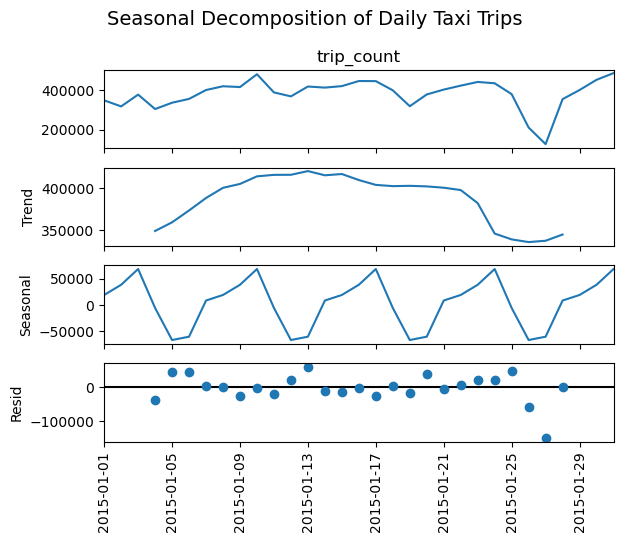

In [183]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Perform decomposition
decomposition = sm.tsa.seasonal_decompose(
    daily_trips['trip_count'],
    model='additive',
    period=7
)

# Plot decomposition
fig = decomposition.plot()
plt.suptitle("Seasonal Decomposition of Daily Taxi Trips", fontsize=14)
plt.tight_layout()

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.show()

In [185]:
df.to_csv("cleaned_nyc_taxi_final.csv", index=False)
print("Clean dataset saved successfully.")

Clean dataset saved successfully.


OUTCOMES

Trip Distribution
- Trip Distance is right-skewed — majority are short (<3 miles) rides.
- Trip Duration peaks around 8–12 minutes, typical for city commutes.
- Fare Amount aligns closely with distance and duration.

Temporal Analysis
- Peak Hours: 8–10 AM (morning commute) and 6–8 PM (evening return).
- Low Demand: 2–5 AM (late night).
- Weekday Demand: Fridays & Saturdays show highest trip counts, indicating nightlife activity.
- Seasonal Decomposition: Weekly periodicity clearly visible — 7-day demand cycle consistent with human routines.

Clustering:
- K-Means clustering revealed major pickup hotspots:
 1. Midtown Manhattan
 2. JFK Airport
 3. LaGuardia Airport
 4. Downtown / Financial District

- Cluster visualization showed dense urban core vs. peripheral airport activity.

Time Series Analysis
- Seasonal Decomposition showed:
- Trend: Gradual growth in demand over early months of 2015.
- Seasonal: Weekly cycles (weekends → higher trip counts).
- Residual: Spikes due to weather or holidays (e.g., New Year, Thanksgiving).

Important Features
- Trip distance
-️ Duration
- Hour of the day
- Passenger count (minor influence)